<a href="https://colab.research.google.com/github/valeriaDD/LFPC_labs/blob/main/lab1/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: LFPC
Dubina Valeria FAF-203

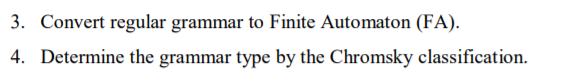

***Varianta 8***

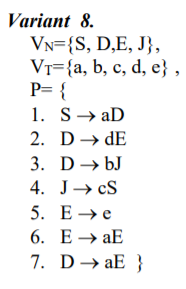

## Grammer type
This specific grammer is of ***type 3*** - *regular grammar*

In [168]:
nodesList = []
adj_list = {}
edges = []

# Functions for prepareing data for plotting 
def transformStates():
  nodeDict = {}
  counter = 0
  for node in nodesList:
    if(node != 'Start'):
      nodeDict[node] = "q"+ str(counter)
      counter+=1
  return nodeDict

def addEdgeForPlot(node1, weight, node2):
  nodeDict = transformStates()
  if(node1 != 'Start'):
    temp = (nodeDict[node1], nodeDict[node2], weight )
    edges.append(temp)
  else:
    temp = (node1, nodeDict[node2], weight )
    edges.append(temp)
  return 

#Functions to construct the linked list 
#             representation of the Finite Automaton (FA)
def addToNodesList(node, node2):
  if node not in nodesList:
    nodesList.append(node);
  if node2 not in nodesList:
    nodesList.append(node2);
  return


def add_edge(node1, weight, node2):
  if node2 == "":
    node2 = "finalNode"
  temp = []
  addToNodesList(node1, node2)
  if node1 not in adj_list:
    temp.append([node2,weight])
    adj_list[node1] = temp;
  else:
    temp.extend(adj_list[node1]) #adds all the elements of list to the end of the list.
    temp.append([node2,weight])
    adj_list[node1] = temp  
  addEdgeForPlot(node1, weight, node2)
  return

#    Function for FA traversal
# True - sequence fits the FA
# False - sequence does not fit the FA 
def isAcceped(stringInput):
  lastAdjListItem = list(adj_list)[-1]
  key = 'S'
  if(stringInput[-1] not in adj_list[lastAdjListItem][-1]):
    return False
  if(key != "finalNode"):
    for char in stringInput:
      for index in range (len(adj_list[key])):
        if char in adj_list[key][index]:
          key = adj_list[key][index][0]
          break
        elif index ==  (len(adj_list[key])) -1:
          return False

  return True

# Function for graph visualization in LinkedList form 
def graphVisualization():
  for node in adj_list:
    print(node, " ---> ", [values for values in adj_list[node]])
  return
  
add_edge('Start','','S')
add_edge('S','a','D')
add_edge('D','d','E')
add_edge('D','b','J')
add_edge('D','a','E')
add_edge('J','c','S')
add_edge('E','a','E')
add_edge('E','e', "")

graphVisualization()

print(isAcceped("aae"))
print(isAcceped("ade"))
print(isAcceped("adaaaaaaaaaaaaaaaaae"))
print(isAcceped("abcabcaae"))
print(isAcceped("abcabcaade"))
print(isAcceped("abcabcabcabc"))

Start  --->  [['S', '']]
S  --->  [['D', 'a']]
D  --->  [['E', 'd'], ['J', 'b'], ['E', 'a']]
J  --->  [['S', 'c']]
E  --->  [['E', 'a'], ['finalNode', 'e']]
True
True
True
True
False
False


In [163]:
!pip install pygraphviz

In [165]:
# Using the graph constructors plot the Finite Automaton (FA)
import networkx as nx
from networkx.drawing.nx_agraph import  to_agraph

def plotFiniteAutomaton():
  Graph = nx.MultiDiGraph()

  for edge in edges:
    Graph.add_edge(edge[0], edge[1], label = edge[2])

  Graph.add_nodes_from([
      ('q4', {"shape": "doublecircle"}),
      ('Start', {"shape": "plaintext"})
  ])

  Graph.graph['edge'] = {'arrowsize': '0.5', 'splines': 'curved'}
  Graph.graph['graph'] = {'scale': '1' }
                                                        
  A = to_agraph(Graph) 
  A.layout('dot')                                                                 
  A.draw('FiniteAutomaton.png') 
  print("Search for FiniteAutomaton.png in files section")
  return

plotFiniteAutomaton()

Search for FiniteAutomaton.png in files section


**Output found in files**




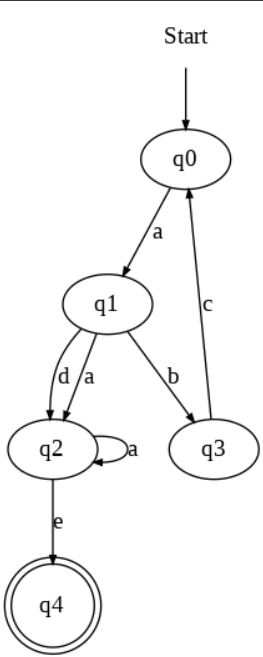
